# NLP Demo, March 24th, 2025
- Jupyter Notebook is an open-source interactive computing environment that allows users to write and run code in a web-based interface. It supports multiple programming languages (like Python) and is widely used for data analysis, machine learning, and scientific research because it enables mixing code, visualisations, and text in one document.

- The Ultimate Markdown Guide (for Jupyter Notebook): https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd


# Spacy Packages Used

In [131]:
import spacy
import heapq
from IPython.display import Image

from collections import Counter

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Syntactic Structure Analysis
- Syntactic analysis (or syntactic parsing) is the process of analysing the grammatical structure of a sentence by identifying word roles, relationships, and patterns. It helps in understanding how words interact to form meaningful sentences based on linguistic rules.
- Improves Language Understanding → Helps NLP systems understand sentence structure and meaning relationships.
- Helps match search queries with meaningful content.

In [28]:
# Input text
text = """The happy cat quickly chased the small mouse through the garden. 
After a long chase, the mouse found a tiny hole and escaped."""

# Read the input text
doc = nlp(text)

In [25]:
# Extract tokens (excluding punctuation)
tokens = [token.text for token in doc if not token.is_punct]
sentences = [sent.text for sent in doc.sents]

print("Tokenised Words:", tokens)
print("Tokenised Sentences:", sentences)

# Stop Word Removal
filtered_tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
print("\nTokens after Stop Word Removal:", filtered_tokens)

# Lemmatisation
lemmatized_words = [(token.text, token.lemma_) for token in doc if not token.is_punct]
print("\nLemmatised Words:", lemmatized_words)

# POS Tagging
pos_tags = [(token.text, token.pos_) for token in doc if not token.is_punct]
print("\nPOS Tags:")
for word, tag in pos_tags:
    print(f"{word:12} -> {tag}")

# Score Word Importance (Word Frequency)
word_frequencies = Counter(filtered_tokens)

# Normalise scores by dividing by the max frequency
max_freq = max(word_frequencies.values(), default=1)
for word in word_frequencies:
    word_frequencies[word] /= max_freq

print("\nWord Importance Scores:")
for word, score in word_frequencies.items():
    print(f"{word:12} -> {score:.2f}")

# Score Sentence Importance Based on Word Frequency
sentence_scores = {}
for sent in sentences:
    for word in sent.split():
        word = word.lower()
        if word in word_frequencies:
            sentence_scores[sent] = sentence_scores.get(sent, 0) + word_frequencies[word]

print("\nSentence Importance Scores:")
for sentence, score in sentence_scores.items():
    print(f"{sentence} -> {score:.2f}")



Tokenized Words: ['The', 'happy', 'cat', 'quickly', 'chased', 'the', 'small', 'mouse', 'through', 'the', 'garden', '\n', 'After', 'a', 'long', 'chase', 'the', 'mouse', 'found', 'a', 'tiny', 'hole', 'and', 'escaped']
Tokenized Sentences: ['The happy cat quickly chased the small mouse through the garden. \n', 'After a long chase, the mouse found a tiny hole and escaped.']

Tokens after Stop Word Removal: ['happy', 'cat', 'quickly', 'chased', 'small', 'mouse', 'garden', '\n', 'long', 'chase', 'mouse', 'found', 'tiny', 'hole', 'escaped']

Lemmatised Words: [('The', 'the'), ('happy', 'happy'), ('cat', 'cat'), ('quickly', 'quickly'), ('chased', 'chase'), ('the', 'the'), ('small', 'small'), ('mouse', 'mouse'), ('through', 'through'), ('the', 'the'), ('garden', 'garden'), ('\n', '\n'), ('After', 'after'), ('a', 'a'), ('long', 'long'), ('chase', 'chase'), ('the', 'the'), ('mouse', 'mouse'), ('found', 'find'), ('a', 'a'), ('tiny', 'tiny'), ('hole', 'hole'), ('and', 'and'), ('escaped', 'escape')]

# Semantic Analysis
- Semantic analysis helps understand the meaning of words and their relationships rather than just sentence structure.
- It includes Named Entity Recognition (NER), word similarity, world relationship extraction

## Named Entity Recognition (NER) – Extracting Key Entities
- Simple sentences may not always contain clear named entities, but in news, financial, and medical text, NER is crucial for extracting key information.

In [149]:
# Input text
text = """Elon Musk founded SpaceX in California. 
Google and Microsoft are competing in the AI race."""

In [150]:
# Read the input text
doc = nlp(text)

# Extract Named Entities
print("Named Entities and Categories:")
for ent in doc.ents:
    print(f"{ent.text:15} | Entity Type: {ent.label_}")

Named Entities and Categories:
Elon Musk       | Entity Type: PERSON
California      | Entity Type: GPE
Google          | Entity Type: ORG
Microsoft       | Entity Type: ORG
AI              | Entity Type: ORG


## Word Similarity – Measuring Conceptual Relationships
-  Compare words based on their semantic meaning using word embeddings.
- Word embedding is a NLP technique that converts words into numerical vectors, capturing their meanings and relationships with other words based on context.
- Word embeddings help chatbots, recommendation systems, and document clustering by identifying conceptual relationships:

    - Chatbots: Understand the intent behind a user's query, even if the exact words aren’t used, by recognising similar meanings.
    - Recommendation Systems: Suggest items or content by understanding the relationship between different words (e.g., suggesting a product similar to a user's previous choice).
    - Document Clustering: Group documents with similar topics together by comparing the underlying concepts in the words.

In [43]:
# Load spacy model with word vectors
nlp = spacy.load("en_core_web_md")  # Medium model includes word vectors

# Input text
text = """The happy cat quickly chased the small mouse through the garden. 
After a long chase, the mouse found a tiny hole and escaped."""

In [47]:
# Read the input text
doc = nlp(text)

# Automatically find "cat" and "mouse" in the sentence
word1 = None
word2 = None

for token in doc:
    if token.text.lower() == "cat":
        word1 = token
    if token.text.lower() == "mouse":
        word2 = token
    
similarity = word1.similarity(word2)
print(f"Similarity between '{word1.text}' and '{word2.text}': {similarity:.2f}")

# "cat" and "mouse" are moderately similar because they are both animals.

Similarity between 'cat' and 'mouse': 0.53


## Relationship Extraction 

- Relationship Extraction  is the process of identifying semantic relationships between entities in a sentence. This is commonly used in knowledge graphs, question answering, information retrieval, and AI-powered assistants.

- How Relationship Extraction Works
    - Identifies entities like people, locations, organisations.
    - Dependency Parsing → Determines how words relate to each other grammatically.
    - Triplet Extraction (Subject-Relation-Object) → Extracts meaningful relationships (e.g., Elon Musk → founded → SpaceX).
    - By identifying subject-verb-object triplets, we extract useful facts from text.
    - Improves Search & Retrieval for Answers
            - Question: "Who chased mouse?"
            - With Relationship Extraction: AI quickly finds:
            - "cat → chased → mouse"

In [80]:
## We'll extract subject-verb-object (SVO) triplets, which represent relationships between entities in a sentence.

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Input text
text = """The happy cat quickly chased the small mouse through the garden. 
After a long chase, the mouse found a tiny hole and escaped."""

doc = nlp(text)

# Function to extract relationships
def extract_relationships(doc):
    return [
        (token.lemma_.lower(), token.head.lemma_.lower(), child.lemma_.lower())
        for token in doc
        if token.dep_ in ("nsubj", "nsubjpass") and token.head.pos_ == "VERB"
        for child in token.head.children if child.dep_ in ("dobj", "pobj")
    ]

# Extract and print relationships
relationships = extract_relationships(doc)
print("Extracted Relationships (Subject - Verb - Object):")
for subj, verb, obj in relationships:
    print(f"{subj} → {verb} → {obj}")


Extracted Relationships (Subject - Verb - Object):
cat → chase → mouse
mouse → find → hole


## Question Answering Application using Syntactic Analysis and Semantic Analysis (Relationship Extraction)

In [83]:
import re

# Function to answer basic questions
def answer_question(question, relationships):
    question_cleaned = re.sub(r"[^\w\s]", "", question.lower())  # Remove punctuation
    question_doc = nlp(question_cleaned)  # Process with spaCy

    # Extract relevant words from question (lemmas for better matching)
    q_subject = None
    q_verb = None
    for token in question_doc:
        if token.pos_ in ("NOUN", "PROPN", "PRON") and token.lemma_ not in ("who", "what"):  # Ignore question words
            q_subject = token.lemma_
        if token.pos_ == "VERB":
            q_verb = token.lemma_

    print(f"🔹 Processed Question: Subject = {q_subject}, Verb = {q_verb}")

    # Match extracted relationships
    for subj, verb, obj in relationships:
        if (q_subject in (subj, obj)) and q_verb == verb:
            return f"{subj.capitalize()} {verb} {obj}."

    return "I don't know the answer."


# Example Questions
questions = [
    "Who chased the mouse?",
    "What did the mouse find?",
    "What happened to the cat?"
]

# Generate answers
print("\n🔹 AI-Generated Answers:")
for q in questions:
    print(f"Q: {q}")
    print(f"A: {answer_question(q, relationships)}\n")



🔹 AI-Generated Answers:
Q: Who chased the mouse?
🔹 Processed Question: Subject = mouse, Verb = chase
A: Cat chase mouse.

Q: What did the mouse find?
🔹 Processed Question: Subject = mouse, Verb = find
A: Mouse find hole.

Q: What happened to the cat?
🔹 Processed Question: Subject = cat, Verb = happen
A: I don't know the answer.



# Sentiment Analysis
- Sentiment analysis (also known as opinion mining) is the process of determining the emotional tone expressed in text. It is commonly used in customer feedback analysis, brand monitoring, chatbot interactions, and AI-driven decision-making.
- Types of Sentiment Analysis
    - Word-Level: Determines the emotion of individual words.
    - Sentence-Level: Analyses overall polarity (positive, negative, neutral) of a sentence.
    - Document-Level: Determines the sentiment of an entire article, review, or conversation.

## Binary Sentiment Analysis: Word & Sentence Level

In [154]:
import spacy
from textblob import TextBlob

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Input text with different emotions
text = """I absolutely love the beautiful scenery and the peaceful atmosphere. 
But the service was terrible, and the staff were rude and unhelpful."""

doc = nlp(text)

# 🔹 Word-Level
print("🔹 Word-Level Sentiment Scores:")
for token in doc:
    word_sentiment = TextBlob(token.text).sentiment.polarity  # Get sentiment polarity (-1 to 1)
    if word_sentiment != 0:  # Only print words with sentiment
        print(f"{token.text:12} | Sentiment Score: {word_sentiment:.2f}")
        
# 🔹 Sentence-Level Sentiment Analysis
print("\n🔹 Sentence-Level Sentiment Scores:")
for sent in doc.sents:
    sentence_sentiment = TextBlob(sent.text).sentiment.polarity  # Get sentiment polarity
    sentiment_label = "Positive" if sentence_sentiment > 0 else "Negative" \
    if sentence_sentiment < 0 else "Neutral"
    print(f"Sentence: {sent.text}\nSentiment Score: {sentence_sentiment:.2f} ({sentiment_label})\n")


🔹 Word-Level Sentiment Scores:
absolutely   | Sentiment Score: 0.20
love         | Sentiment Score: 0.50
beautiful    | Sentiment Score: 0.85
peaceful     | Sentiment Score: 0.25
terrible     | Sentiment Score: -1.00
rude         | Sentiment Score: -0.30

🔹 Sentence-Level Sentiment Scores:
Sentence: I absolutely love the beautiful scenery and the peaceful atmosphere. 

Sentiment Score: 0.53 (Positive)

Sentence: But the service was terrible, and the staff were rude and unhelpful.
Sentiment Score: -0.65 (Negative)



## Visualisation of Sentiments

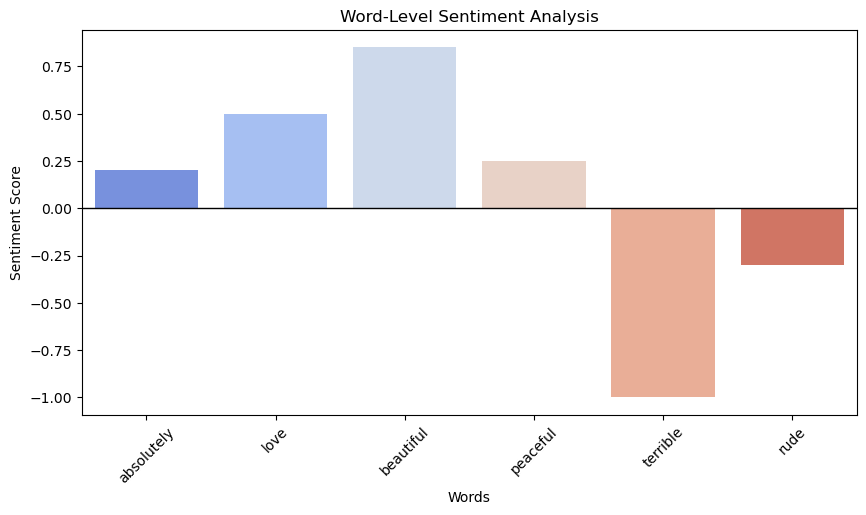

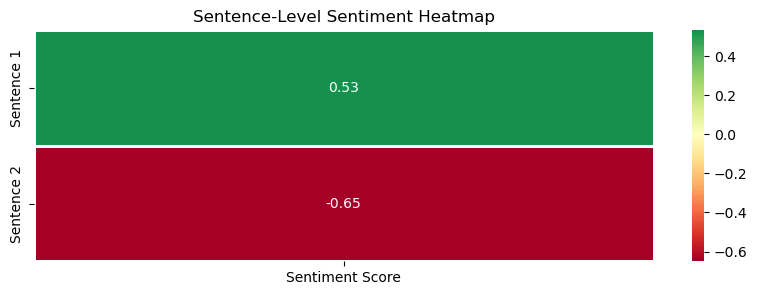

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Store word-level sentiments
word_sentiments = {
    token.text: TextBlob(token.text).sentiment.polarity for token in doc if TextBlob(token.text).sentiment.polarity != 0
}

# Store sentence-level sentiments
sentence_sentiments = {
    sent.text: TextBlob(sent.text).sentiment.polarity for sent in doc.sents
}

# 🔹 Word-Level Sentiment Visualisation
plt.figure(figsize=(10, 5))
sns.barplot(x=list(word_sentiments.keys()), y=list(word_sentiments.values()), palette="coolwarm")
plt.axhline(0, color="black", linewidth=1)  # Reference line for neutral sentiment
plt.xlabel("Words")
plt.ylabel("Sentiment Score")
plt.title("Word-Level Sentiment Analysis")
plt.xticks(rotation=45)
plt.show()

# 🔹 Sentence-Level Sentiment Visualisation (Heatmap)
plt.figure(figsize=(10, 3))

# Convert sentence_sentiments to a list of lists (format required for Seaborn heatmap)
sentiment_values = [[score] for score in sentence_sentiments.values()]  

sns.heatmap(
    sentiment_values,
    annot=True,  # Directly pass numerical values for annotation
    fmt=".2f",  # Format numbers correctly
    cmap="RdYlGn", center=0, linewidths=1, xticklabels=["Sentiment Score"], 
    yticklabels=[f"Sentence {i+1}" for i in range(len(sentence_sentiments))]
)
plt.title("Sentence-Level Sentiment Heatmap")
plt.show()

## Emotion Analysis and Visualisation
- Emotion extraction is an extension of sentiment analysis that goes beyond positive/negative sentiment to categorise emotions such as joy, anger, sadness, fear, trust, anticipation, surprise, and disgust. It helps in understanding the deeper emotional context of a text rather than just its polarity.
- To improve emotion classification, we will use NRC Emotion Lexicon, a well-known dictionary-based emotion classification system instead of hardcoding emotions.
- Emotion extraction enhances traditional sentiment analysis by detecting specific emotions rather than just polarity (positive/negative).
- Provides richer insights by identifying specific emotions instead of just polarity.
- Identifies emotional trends in text.

### Step 1: Download & Load NRC Emotion Lexicon
- The NRC Emotion Lexicon is a dictionary that maps words to 8 emotions (joy, anger, sadness, fear, trust, anticipation, surprise, and disgust) and positive/negative sentiment: https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm

In [125]:
import requests

# Download NRC Emotion Lexicon (if not already available)
nrc_local_path = "NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"

# Function to load NRC Emotion Lexicon from a local file
def load_nrc_emotion_lexicon(filepath):
    emotion_dict = {}
    
    with open(filepath, "r", encoding="utf-8") as file:
        for line in file:
            parts = line.strip().split("\t")  # Use tab separation
            if len(parts) == 3:
                word, emotion, value = parts
                if int(value) == 1:  # Only store words with emotion associations
                    if word not in emotion_dict:
                        emotion_dict[word] = []
                    emotion_dict[word].append(emotion)
    
    return emotion_dict

# Load the NRC emotion lexicon
emotion_dict = load_nrc_emotion_lexicon(nrc_local_path)

### Step 2: Extract Emotion Words from Text

{'joy': ['love', 'beautiful', 'peaceful'], 'anger': ['terrible'], 'sadness': ['terrible'], 'fear': ['terrible'], 'trust': ['peaceful'], 'anticipation': ['peaceful'], 'surprise': ['peaceful'], 'disgust': ['terrible']}


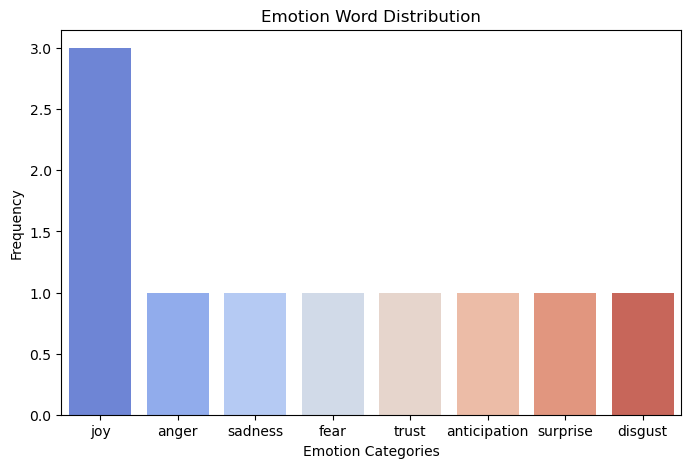

🔹 Extracted Emotion Words:
Joy: love, beautiful, peaceful
Anger: terrible
Sadness: terrible
Fear: terrible
Trust: peaceful
Anticipation: peaceful
Surprise: peaceful
Disgust: terrible


In [126]:
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Input text with different emotions
text = """I absolutely love the beautiful scenery and the peaceful atmosphere. 
But the service was terrible, and the staff were rude and unhelpful."""
doc = nlp(text)

# Initialise emotion word storage
emotion_words = {
    "joy": [], "anger": [], "sadness": [], "fear": [], "trust": [], 
    "anticipation": [], "surprise": [], "disgust": []
}

# Extract words matching emotion lexicon
for token in doc:
    word = token.lemma_.lower().strip()  # Convert to lemma and strip whitespace
    if word in emotion_dict:
        for emotion in emotion_dict[word]:
            if emotion in emotion_words:  # Ensure it's one of the 8 key emotions
                emotion_words[emotion].append(word)

# Count occurrences of each emotion
emotion_counts = {emotion: len(words) for emotion, words in emotion_words.items()}

# 🔹 Visualisation: Emotion Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=list(emotion_counts.keys()), y=list(emotion_counts.values()), palette="coolwarm")
plt.xlabel("Emotion Categories")
plt.ylabel("Frequency")
plt.title("Emotion Word Distribution")
plt.show()

# 🔹 Print Extracted Emotion Words
print("🔹 Extracted Emotion Words:")
for emotion, words in emotion_words.items():
    if words:
        print(f"{emotion.capitalize()}: {', '.join(words)}")


# Topic Modelling
- Topic Modeling is an unsupervised machine learning technique used to discover hidden topics within a large collection of text. It helps in summarising, organising, and analysing text data by grouping similar words into topics.
- Common Techniques for Topic Modeling
    - Latent Dirichlet Allocation (LDA): A probabilistic model that assigns words to topics based on co-occurrence.
    - Non-Negative Matrix Factorisation (NMF) → Decomposes text into topics using linear algebra.
    - Latent Semantic Analysis (LSA) → Uses Singular Value Decomposition (SVD) to detect hidden topics.

## Topic Modelling Using LdaModel

In [114]:
import spacy
import gensim
import nltk
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK resources
nltk.download("punkt")
nltk.download("stopwords")

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Sample text dataset
documents = [
    "Machine learning and artificial intelligence are transforming industries.",
    "Deep learning improves neural networks, making AI more powerful.",
    "Economics and finance rely on market analysis and stock predictions.",
    "Investors use machine learning to forecast financial trends.",
    "Natural Language Processing (NLP) is a key area in AI development.",
    "Stock market trends are influenced by political and economic factors."
]

# Tokenisation & Stopword Removal
stop_words = set(stopwords.words("english"))
processed_docs = []
for doc in documents:
    tokens = word_tokenize(doc.lower())  # Tokenise words
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Remove stopwords & punctuation
    processed_docs.append(tokens)

# Create Dictionary and Corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(text) for text in processed_docs]

# Apply LDA Topic Modeling
num_topics = 2
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Extract topic-word distributions
topic_words = {}
for topic_id in range(num_topics):
    words = lda_model.show_topic(topic_id, topn=10)  # Get top words per topic
    topic_words[f"Topic {topic_id + 1}"] = {word: weight for word, weight in words}

# Print Identified Topics
print("\n🔹 Identified Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")


[nltk_data] Downloading package punkt to /Users/ykang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ykang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



🔹 Identified Topics:
Topic 1: 0.066*"learning" + 0.066*"trends" + 0.066*"machine" + 0.040*"stock" + 0.040*"market" + 0.039*"use" + 0.039*"forecast" + 0.039*"investors" + 0.039*"financial" + 0.039*"economic"
Topic 2: 0.061*"ai" + 0.037*"language" + 0.037*"key" + 0.037*"development" + 0.037*"natural" + 0.037*"processing" + 0.037*"nlp" + 0.037*"area" + 0.037*"deep" + 0.037*"neural"


Identified Topics:
- ✅ Topic 1 is about AI & Machine Learning (keywords: "learning", "machine", "AI")
- ✅ Topic 2 is about Stock Markets (keywords: "stock", "market")

## Topic Visualisation

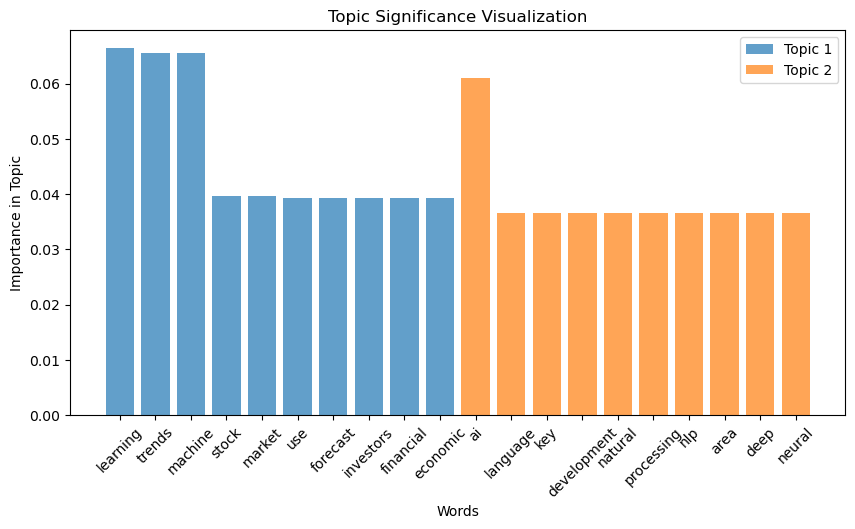

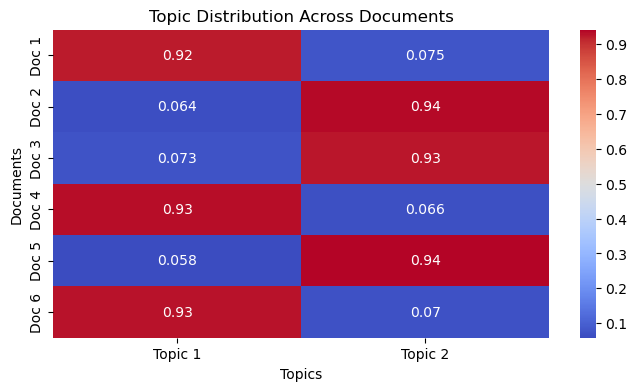

In [115]:
# 🔹 Visualising Topic Importance (Bar Chart)
plt.figure(figsize=(10, 5))
for topic, words in topic_words.items():
    plt.bar(words.keys(), words.values(), alpha=0.7, label=topic)

plt.xlabel("Words")
plt.ylabel("Importance in Topic")
plt.title("Topic Significance Visualisation")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 🔹 Visualising Topic Distribution Across Documents (Heatmap)
doc_topics = []
for i, doc_bow in enumerate(corpus):
    doc_distribution = lda_model.get_document_topics(doc_bow, minimum_probability=0)
    doc_topics.append([prob for _, prob in doc_distribution])

plt.figure(figsize=(8, 4))
sns.heatmap(doc_topics, annot=True, cmap="coolwarm", xticklabels=[f"Topic {i+1}" for i in range(num_topics)], 
            yticklabels=[f"Doc {i+1}" for i in range(len(documents))])
plt.xlabel("Topics")
plt.ylabel("Documents")
plt.title("Topic Distribution Across Documents")
plt.show()

# Generative AI


## Syntactic Analysis
- Syntactic analysis determines sentence structure, identifying POS and word relationships (dependency parsing). It helps in understanding sentence formation, subject-verb-object structure, and grammatical roles.


In [164]:
# Prompt for Syntactic Structure Analysis Using ChatGPT

"""
Analyse the syntactic structure of the following text. Perform the following tasks:  
**Text**: "The happy cat quickly chased the small mouse through the garden. 
After a long chase, the mouse found a tiny hole and escaped."

- Tokenisation: Extract words and sentences while removing punctuation.  
- Stopword Removal: Filter out common words that do not contribute much meaning.  
- Lemmatisation: Convert words to their base form.  
- POS Tagging: Identify the part of speech for each word.  
- Word Importance: Compute word frequencies and normalise their importance scores.  
- Sentence Importance: Rank sentences based on the significance of their words.  


Return the results in a structured format, including tables or lists for better readability.
"""

'\nAnalyse the syntactic structure of the following text. Perform the following tasks:  \n**Text**: "The happy cat quickly chased the small mouse through the garden. \nAfter a long chase, the mouse found a tiny hole and escaped."\n\n- Tokenisation:Extract words and sentences while removing punctuation.  \n- Stopword Removal:** Filter out common words that do not contribute much meaning.  \n- Lemmatisation: Convert words to their base form.  \n- POS Tagging: Identify the part of speech for each word.  \n- Word Importance:Compute word frequencies and normalise their importance scores.  \n- Sentence Importance: Rank sentences based on the significance of their words.  \n\n\nReturn the results in a structured format, including tables or lists for better readability.\n'

## Semantic Analysis
- NER extraction
- Word similarity
- Relationship extraction

In [127]:
"""
Perform semantic analysis on the following text. 
**Text**: "I absolutely love the beautiful scenery and the peaceful atmosphere. 
But the service was terrible, and the staff were rude and unhelpful."

- Identify named entities.
- Measure word similarity between cat and mouse.
- Extra word relatioships between cat and mouse.

Return the results in a structured format, including tables or lists for better readability.
"""

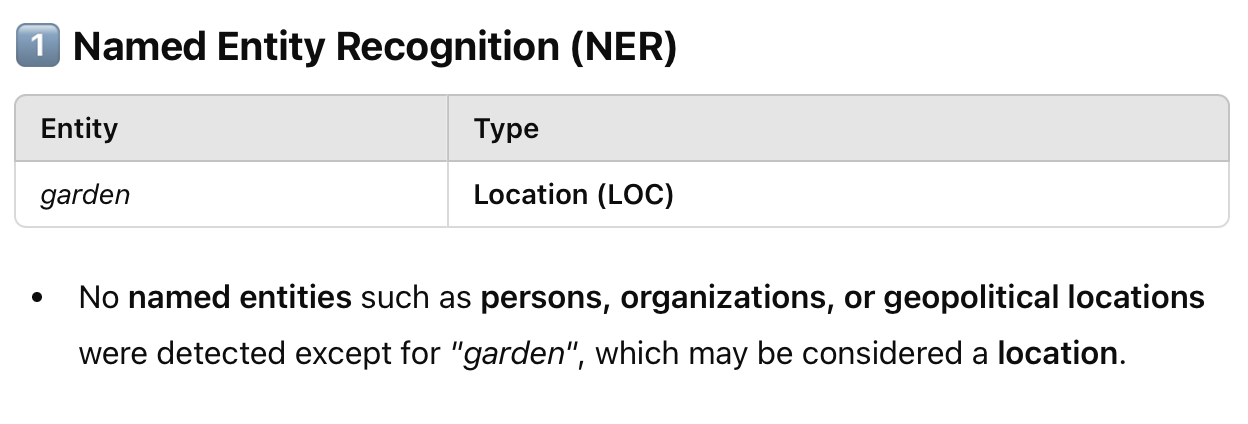

In [155]:
Image("images/NER.png", width=600)

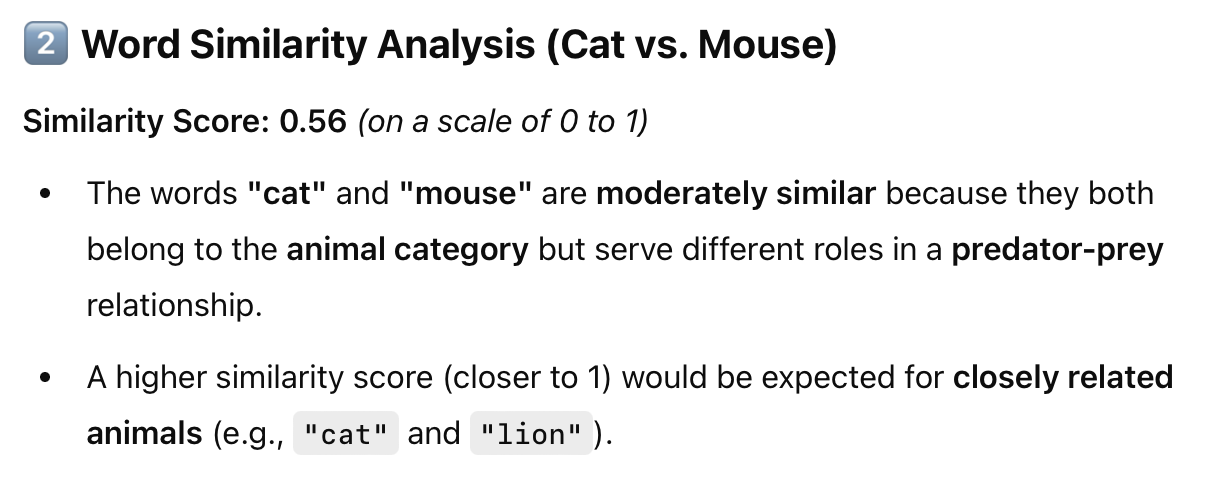

In [156]:
Image("images/word similarity.png", width=600)

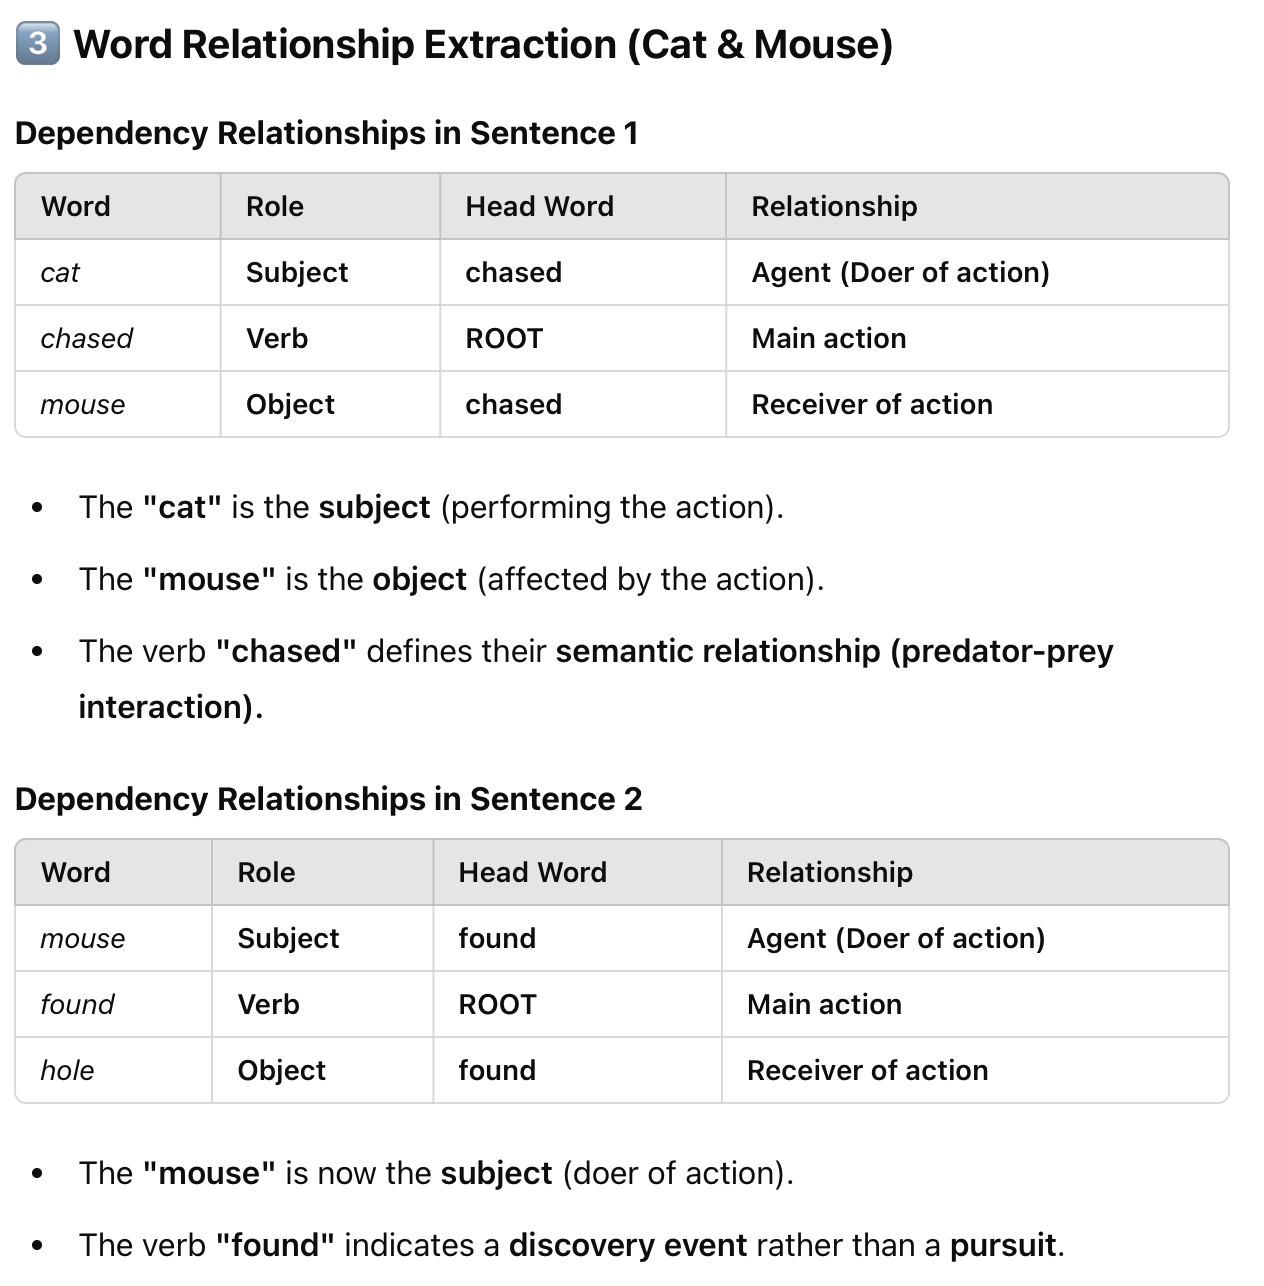

In [157]:
Image("images/word relationship.png", width=600)

## Sentiment Analysis
- Binary sentiment analysis
- Emotion analysis

In [158]:
"""
Perform a detailed sentiment and emotion analysis on the following text. Extract and analyse the 
following components:
**Text**: "I absolutely love the beautiful scenery and the peaceful atmosphere. 
But the service was terrible, and the staff were rude and unhelpful."

- Word-Level Sentiment Analysis: Assign a sentiment score between [-1, 1] to each word and list 
  words along with their sentiment polarity.
- Sentence-Level Sentiment Analysis: Compute the overall sentiment score for each sentence and 
  classify it as positive, negative, or neutral.
- Emotion Classification: Identify words that convey emotions and categorise them into the following classes:
  Joy, Anger, Sadness, Fear, Trust, Anticipation, Surprise, and Disgust. 
  For each category, count the number of words assigned to it and present the results in a structured table.

Return the results in a structured format, including tables or lists for better readability.
"""

'\nPerform a detailed sentiment and emotion analysis on the following text. Extract and analyse the following components:\n**Text**: "I absolutely love the beautiful scenery and the peaceful atmosphere. \nBut the service was terrible, and the staff were rude and unhelpful."\n\n- Word-Level Sentiment Analysis: Assign a sentiment score between [-1, 1] to each word and list words along with their sentiment polarity.\n- Sentence-Level Sentiment Analysis: Compute the overall sentiment score for each sentence and classify it as positive, negative, or neutral.\n- Emotion Classification: Identify words that convey emotions and categorise them into the following classes:\nJoy, Anger, Sadness, Fear, Trust, Anticipation, Surprise, and Disgust. For each category, count the number of words assigned to it and present the results in a structured table.\n\nReturn the results in a structured format, including tables or lists for better readability.\n'

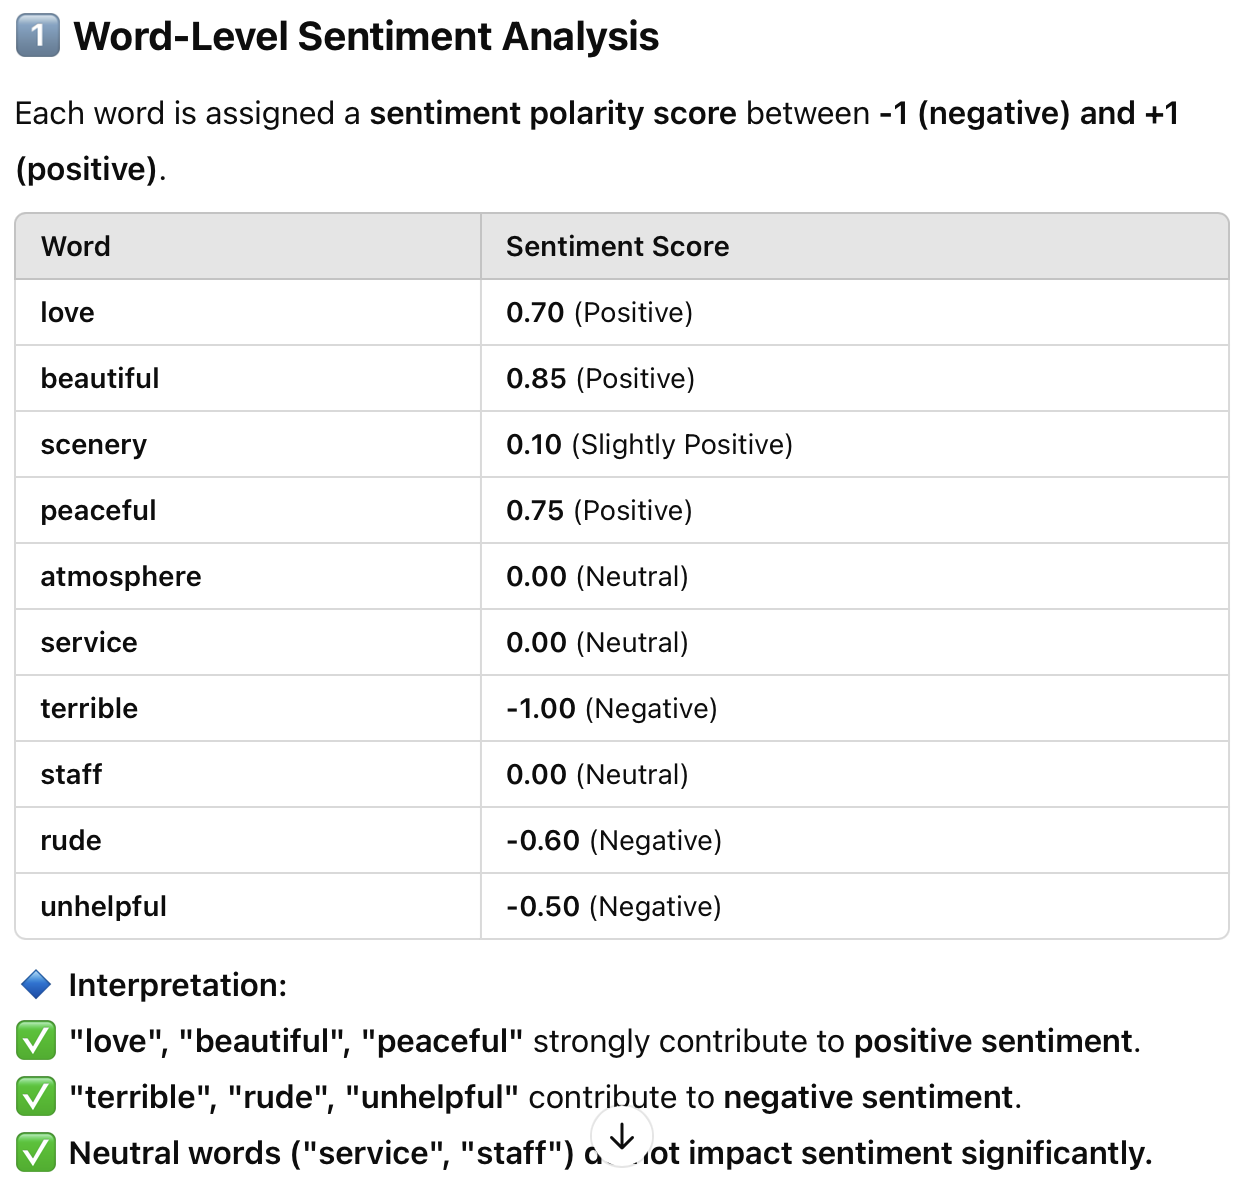

In [159]:
Image("images/word-level sentiment.png", width=600)

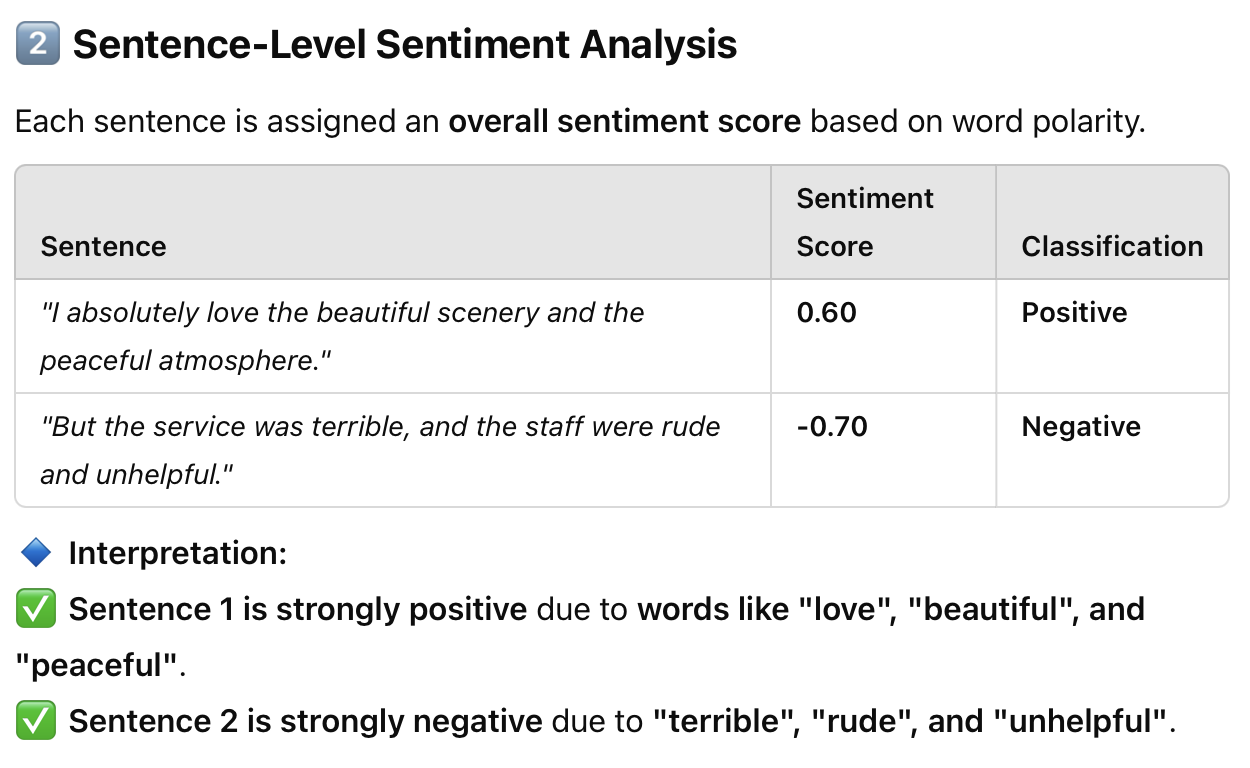

In [160]:
Image("images/sentence-level sentiment.png", width=600)

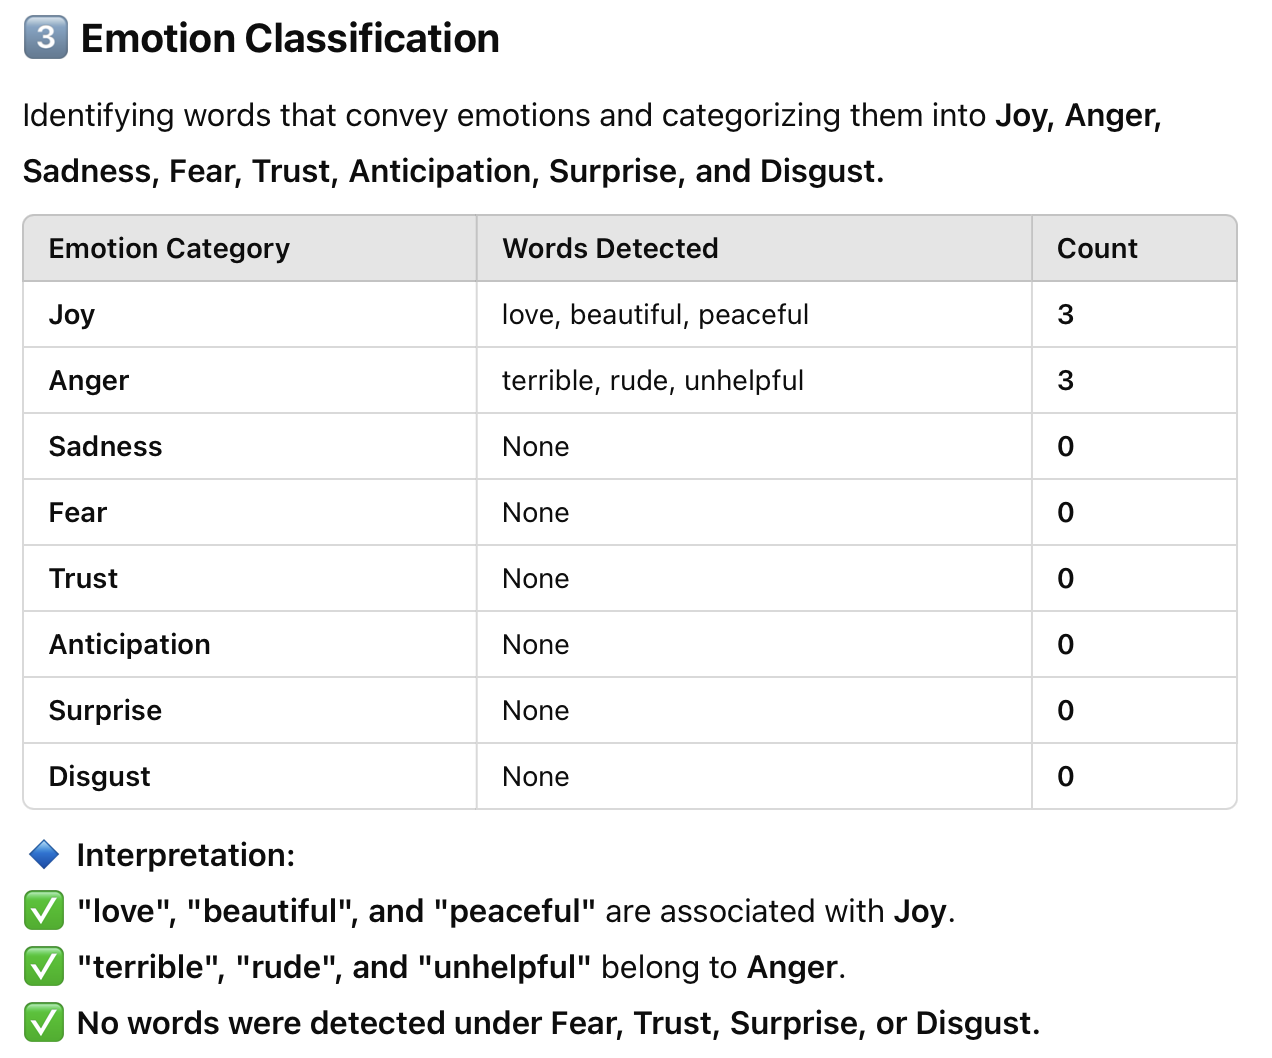

In [161]:
Image("images/emotion extraction.png", width=600)

## Topic Modelling

In [162]:
"""
Analyse the following text and extract key topics using topic modeling techniques. 
**Text**: [ 
    "Machine learning and artificial intelligence are transforming industries.",
    "Deep learning improves neural networks, making AI more powerful.",
    "Economics and finance rely on market analysis and stock predictions.",
    "Investors use machine learning to forecast financial trends.",
    "Natural Language Processing (NLP) is a key area in AI development.",
    "Stock market trends are influenced by political and economic factors."
]

- Identify the most relevant words and summarise the central theme of the text.

Return the results in a structured format, including tables or lists for better readability.

"""

'\nAnalyse the following text and extract key topics using topic modeling techniques. \n**Text**: [ \n    "Machine learning and artificial intelligence are transforming industries.",\n    "Deep learning improves neural networks, making AI more powerful.",\n    "Economics and finance rely on market analysis and stock predictions.",\n    "Investors use machine learning to forecast financial trends.",\n    "Natural Language Processing (NLP) is a key area in AI development.",\n    "Stock market trends are influenced by political and economic factors."\n]\n\n- Identify the most relevant words and summarise the central theme of the text.\n\nReturn the results in a structured format, including tables or lists for better readability.\n\n'

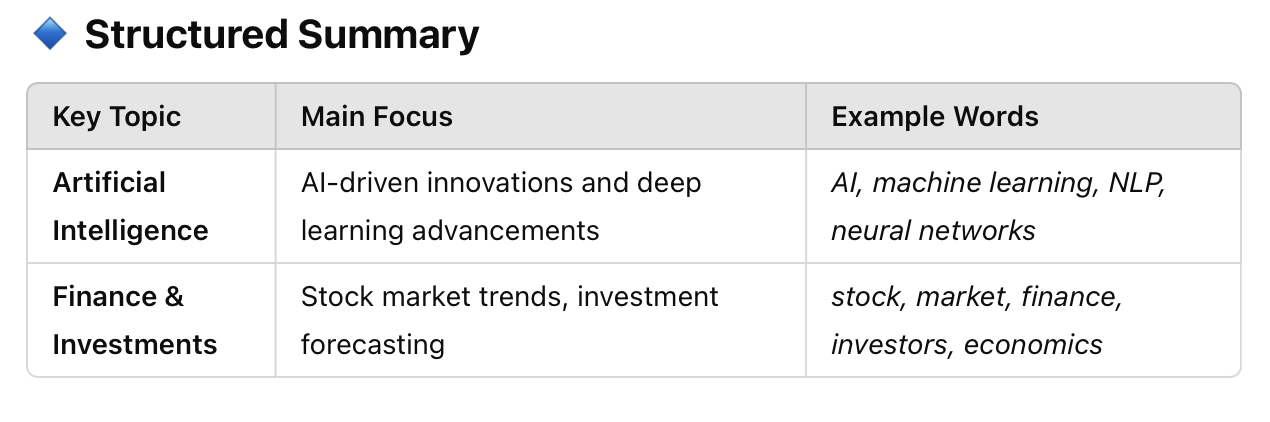

In [163]:
Image("images/topic_modelling.png", width=600)